# Experiment 12  

## Problem Statement:
To apply autoencoders on image dataset. 

## GitHub & Google Colab Link: 

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%2012/Experiment%2012.ipynb

Google Colab Link: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%2012/Experiment%2012.ipynb)


## Installing Dependencies:

In [1]:
! pip install tabulate numpy pandas matplotlib seaborn

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - loss: 0.5942 - val_loss: 0.5630
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - loss: 0.5609 - val_loss: 0.5591
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - loss: 0.5580 - val_loss: 0.5580
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - loss: 0.5572 - val_loss: 0.5570
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 164ms/step - loss: 0.5566 - val_loss: 0.5566
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 122ms/step - loss: 0.5561 - val_loss: 0.5560
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - loss: 0.5552 - val_loss: 0.5559
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 86ms/step - loss: 0.5546 - val_loss: 0.5557
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - loss: 0.5551 - val_loss: 0.5551
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - loss: 0.5533 - val_loss: 0.5548
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - loss: 0.5540 - val_loss: 0.5552
Epoch 12/20
782/78

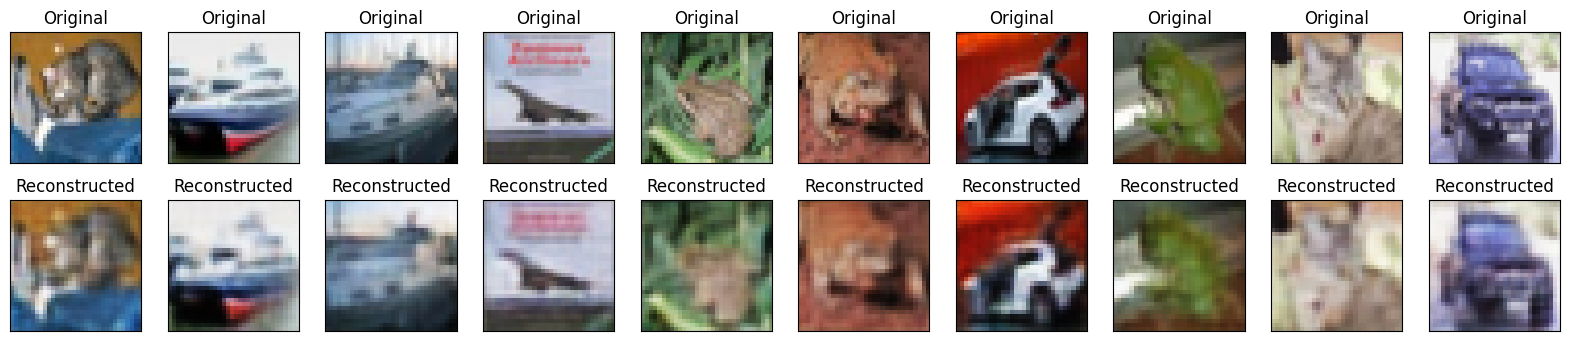

In [3]:

# Load the dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convolutional Autoencoder


def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(
        32, (3, 3), strides=2, activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(
        32, (3, 3), strides=2, activation='relu', padding='same')(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder


autoencoder = build_autoencoder()
autoencoder.summary()

# Training the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

# Display the results


def display_images(original, decoded, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(32, 32, 3))
        plt.title("Original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded[i].reshape(32, 32, 3))
        plt.title("Reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


# Encode and decode images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
display_images(x_test, decoded_imgs)    